In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
ITEMS = "data/items.csv"
ITEM_CATEGORIES = "data/item_categories.csv"
SALES_TRAIN_V2 = "data/sales_train_v2.csv"
SHOPS = "data/shops.csv"
SAMPLE_SUBMISSION = "data/sample_submission.csv"
TEST = "data/test.csv"
OUTPUT = "output"

In [3]:
# Dev dataset
sales_train = pd.read_csv(SALES_TRAIN_V2)

# Common data
items = pd.read_csv(ITEMS)
item_categories = pd.read_csv(ITEM_CATEGORIES)
shops = pd.read_csv(SHOPS)

# Test & sample
sample_submission = pd.read_csv(SAMPLE_SUBMISSION)
test = pd.read_csv(TEST)

## General information

In [4]:
print "Items: {}".format(len(items))
print "Shops: {}".format(len(shops))
print "Categories: {}".format(len(item_categories))
print "Training datasets records: {}".format(len(sales_train))
print "Test dataset records: {}".format(len(test))

Items: 22170
Shops: 60
Categories: 84
Training datasets records: 2935849
Test dataset records: 214200


In [5]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [6]:
# Sales value in time
sales_train.date = pd.to_datetime(sales_train.date)
sales_train['value'] = sales_train.item_price * sales_train.item_cnt_day
sales_train['counter'] = 1

In [7]:
sales_in_time = sales_train.set_index('date').groupby(pd.TimeGrouper('M')).sum()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  if __name__ == '__main__':


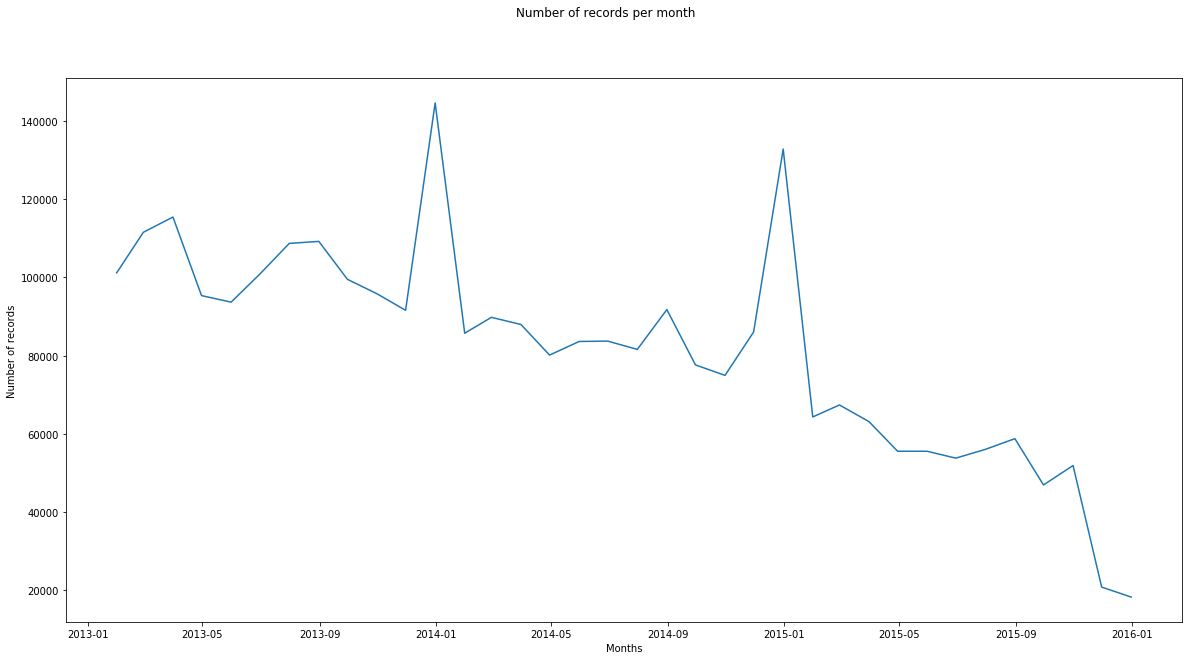

In [12]:
plt.figure(figsize=(20,10))
plt.plot(sales_in_time.counter)
plt.suptitle("Number of records per month")
plt.ylabel("Number of records")
plt.xlabel("Months")
plt.savefig(os.path.join(OUTPUT, "n_records_time.png"))

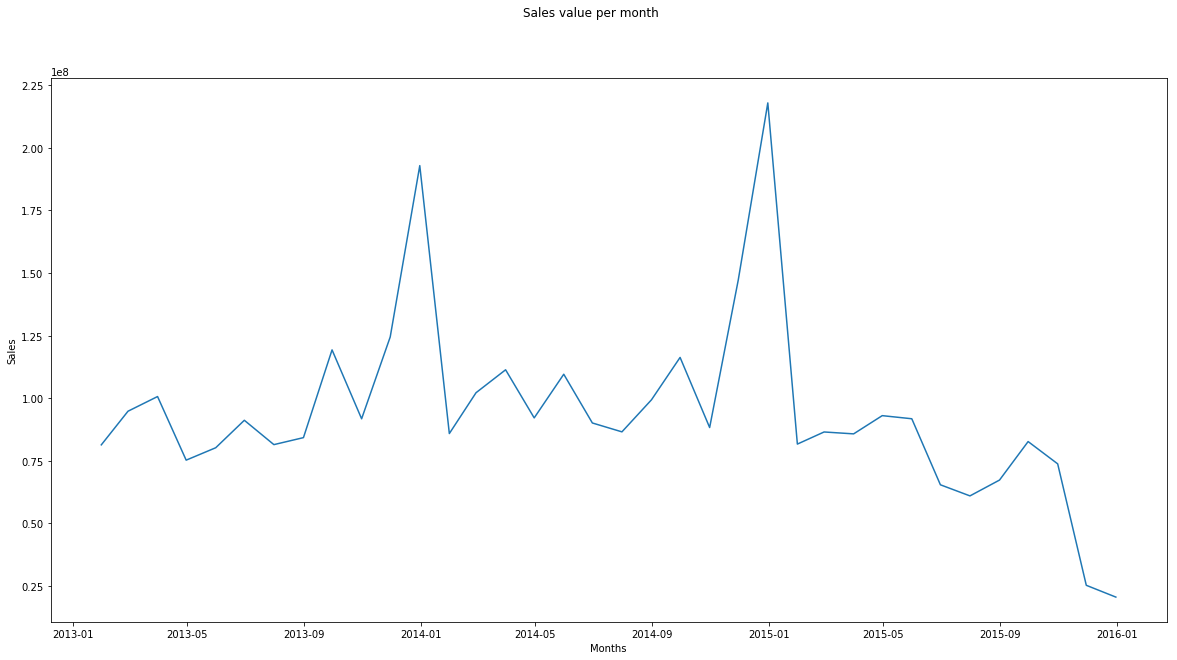

In [13]:
plt.figure(figsize=(20,10))
plt.plot(sales_in_time.value)
plt.suptitle("Sales value per month")
plt.ylabel("Sales")
plt.xlabel("Months")
plt.savefig(os.path.join(OUTPUT, "sales_time.png"))

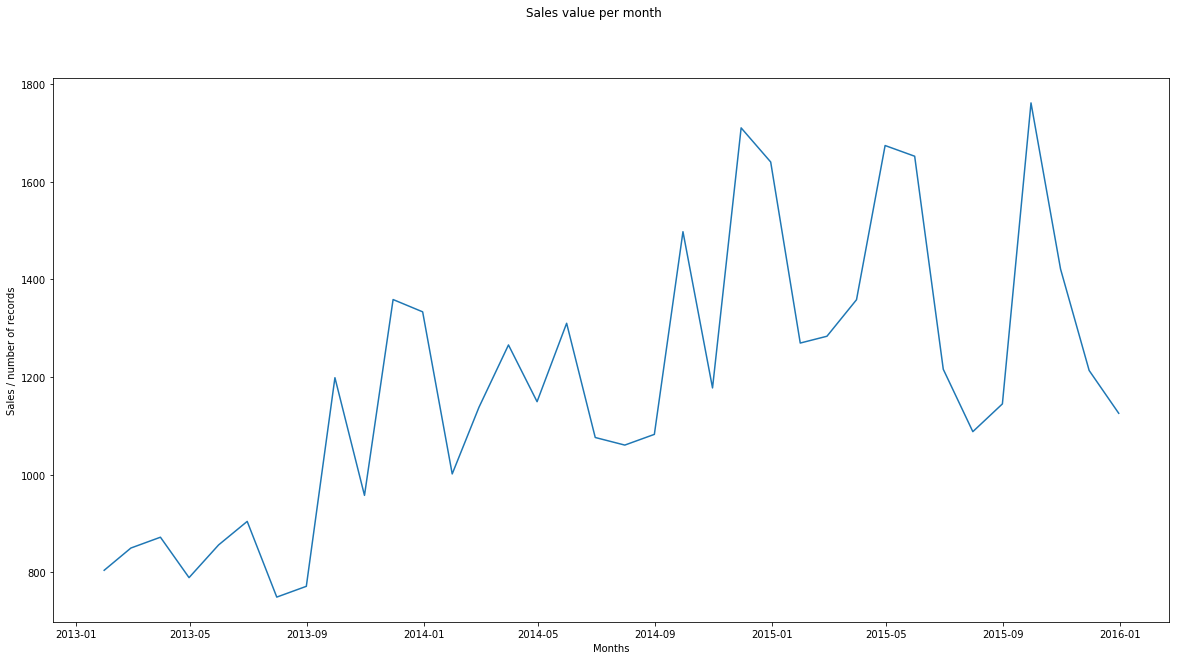

In [14]:
plt.figure(figsize=(20,10))
plt.plot(sales_in_time.value / sales_in_time.counter)
plt.suptitle("Sales value per month")
plt.ylabel("Sales / number of records")
plt.xlabel("Months")
plt.savefig(os.path.join(OUTPUT, "sales_time_normalized.png"))